In [25]:
import pandas as pd
import matplotlib as plt

# Get CSV data and convert to dataframe
df = pd.read_csv("course-data.csv", sep="\t")

In [26]:
# Processing Data
counts = df.loc[:, "Department"].value_counts()
departments = counts.index

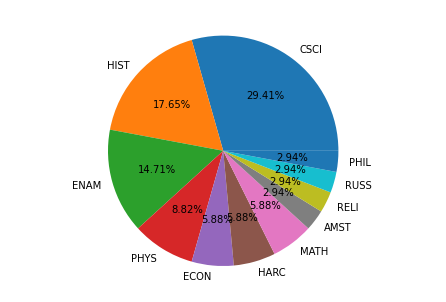

In [27]:
# Displaying Data

fig = plt.pyplot.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(counts,labels = departments, autopct='%1.2f%%')
plt.pyplot.show()